<a href="https://colab.research.google.com/github/Seife1/Financial-Analysis-of-Stocks-from-Financial-News/blob/task-2/notebooks/Technical_Analysis_For_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technical Analysis and Fundamental Analysis For Stock Market**

## **Data Overview**

Financial News and Stock Price Integration Dataset
FNSPID (Financial News and Stock Price Integration Dataset), is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

## **Imports and Reading Data**

In [5]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # missing patterns


In [4]:
# Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
AAPL = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/AAPL_historical_data.csv')
AMZN = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/AMZN_historical_data.csv')
GOOG = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/GOOG_historical_data.csv')
META = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/META_historical_data.csv')
MSFT = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/MSFT_historical_data.csv')
NVDA = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/NVDA_historical_data.csv')
TSLA = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/Technical  Content/Data/yfinance_data/TSLA_historical_data.csv')

Our next focus will be on understanding, exploring, and analyzing this dataset.

## **Data Understanding**

In [5]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [6]:
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [7]:
NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [7]:
# Now I would like to concatenate all the DataFrames into one after adding the 'stock' column to each DataFrame
stocks = [AAPL, MSFT, NVDA, TSLA, META, GOOG, AMZN]

# Add the 'stock' column to each DataFrame
for i, stock in enumerate(stocks):
  stock['Stock'] = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'META', 'GOOG', 'AMZN'][i] # Assign the corresponding stock ticker as the value

data_frame = pd.concat(stocks, ignore_index=True)
data_frame.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [9]:
data_frame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
45423,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,AMZN
45424,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,AMZN
45425,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,AMZN
45426,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,AMZN
45427,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,AMZN


In [10]:
# Shape the combined DataFrame
print(f'Datasets shape: {data_frame.shape}')

Datasets shape: (45428, 10)


In [11]:
# Data info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   Stock         45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ MB


In [12]:
data_frame.dtypes.value_counts()

,count
float64,7
object,2
int64,1


In [13]:
# To ensures that the Date column is recognized as a date,
# I must convert the Date column from an object (string) to a datetime format
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

In [14]:
data_frame.dtypes.value_counts()

,count
float64,7
datetime64[ns],1
int64,1
object,1


In [15]:
# Statistics of our datasets
data_frame.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,45428,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000
mean,2009-04-26 08:53:21.549705216,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499
min,1980-12-12 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000
25%,2002-02-25 18:00:00,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000
50%,2011-06-20 12:00:00,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000
75%,2018-02-15 00:00:00,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000
max,2024-07-30 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000
std,NaN,78.259474,79.277620,77.218532,78.274673,78.049554,3.076645e+08,0.022527,0.155291


The statistics provide insights into the overall performance and characteristics of the technology sectors particularly for the companies ( [ $'AAPL'$, $'MSFT'$, $'NVDA'$, $'TSLA'$,$'META'$, $'GOOG'$, $'AMZN'$] ).Their performance is characterized by high volatility, significant price appreciation, substantial trading volumes, and a focus on reinvestment over dividend payouts. These factors collectively illustrate the tech sector's dynamic nature, its pivotal role in driving market trends, and the ongoing evolution of these companies as they continue to innovate and expand their global impact.

## **Data Preparation**

In [16]:
# Checking for Duplicates columns
duplicated_columns = data_frame.columns[data_frame.columns.duplicated()]
if len(duplicated_columns) > 0:
    print(f"Duplicate columns found: {', '.join(duplicated_columns)}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [17]:
#rows
duplicated_rows = data_frame[data_frame.duplicated()]
if len(duplicated_rows) > 0:
    print(f"Duplicate rows found: {len(duplicated_rows)}")
else:
    print("No duplicate rows found.")

No duplicate rows found.


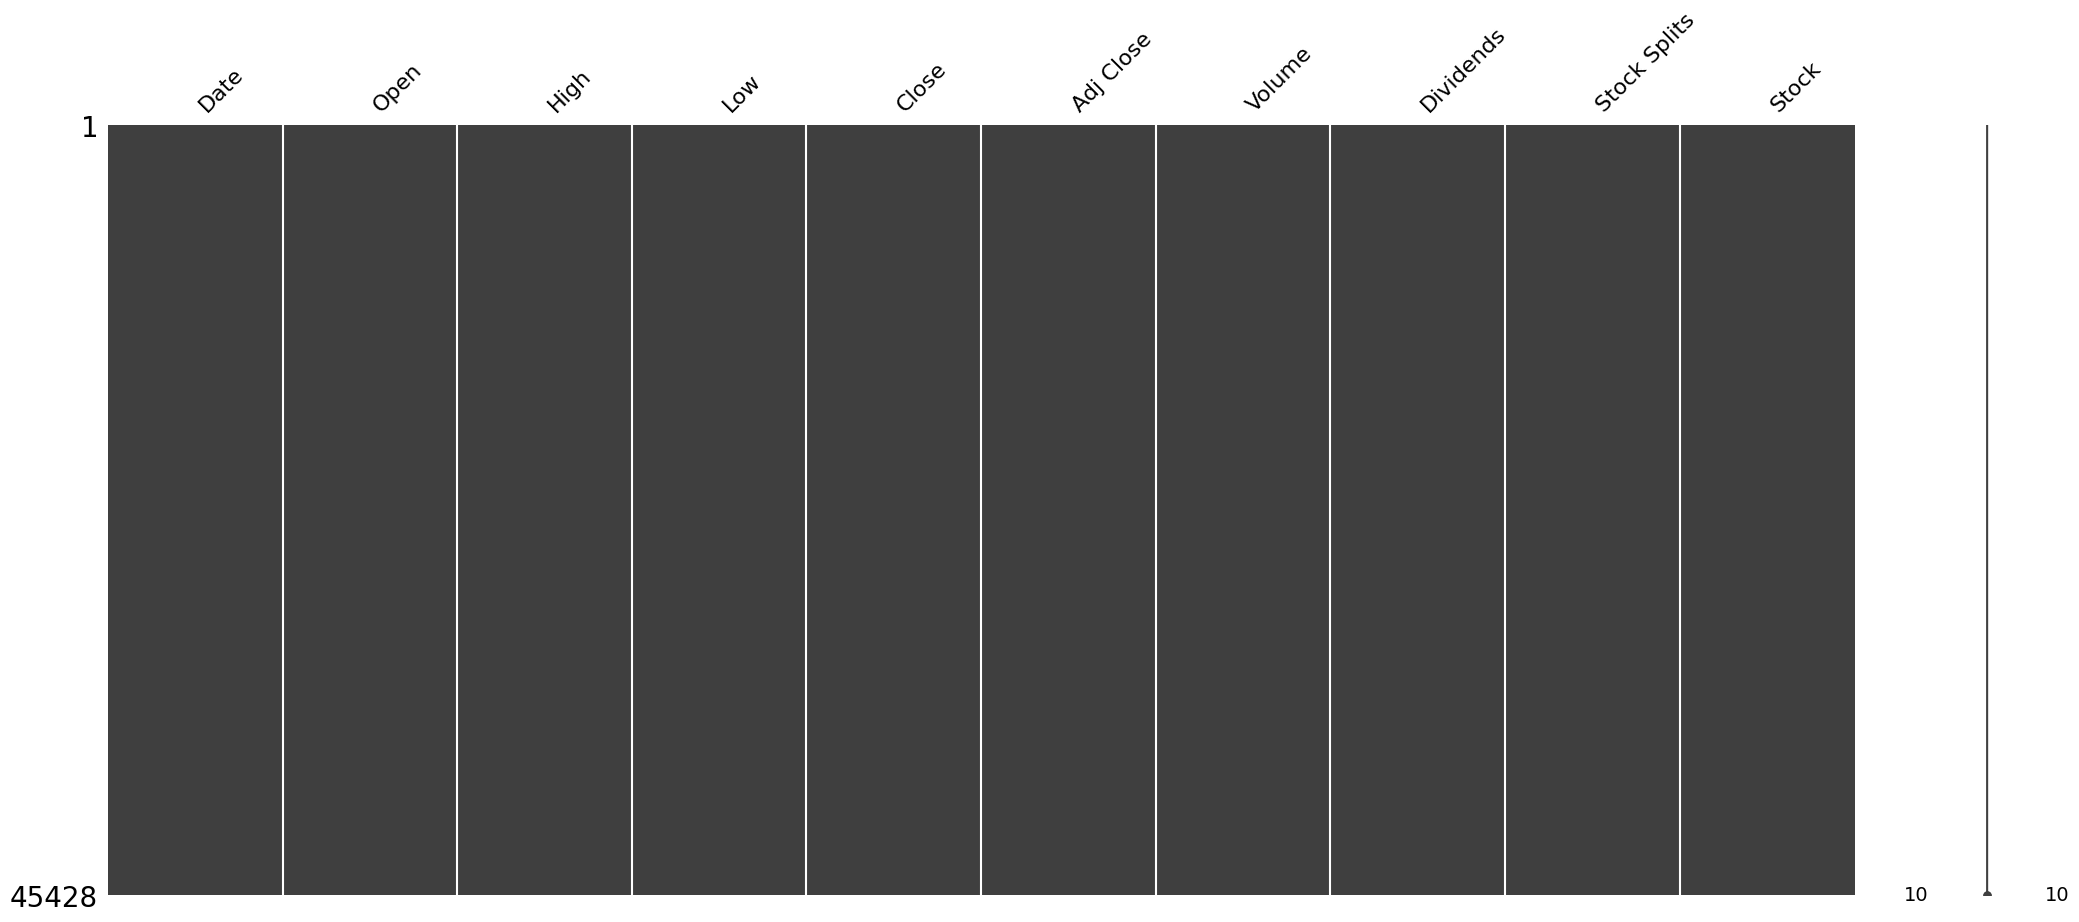

In [18]:
# Checking for missing values by visualizing missing data patterns
msno.matrix(data_frame)
plt.show()

As we have seen from the vissualizer the DataFrame has no missing values.

### **Feature Understanding**

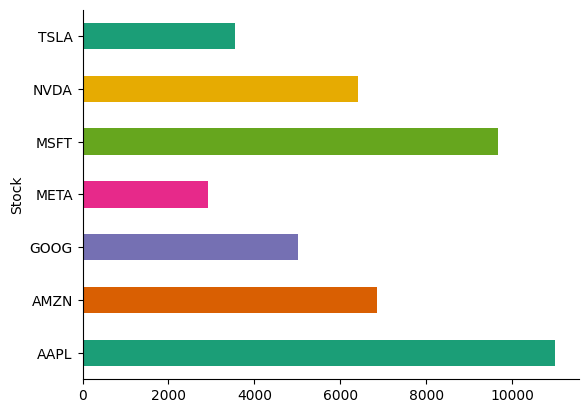

In [19]:
data_frame.groupby('Stock').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

This distribution highlights the varying levels of trading activity or **historical data availability** across these major tech companies. And that Apple (AAPL) has the most extensive dataset, suggesting it has the highest number of records, possibly due to its long trading history or significant market activity, Meta (META) has the smallest dataset, which may be attributed to its later market presence or less frequent trading.

### **Technical Analysis Using TA_Lib**

Technical analysis is a trading discipline employed to evaluate investments and identify trading opportunities by analyzing statistical trends gathered from trading activity, such as price movement and volume — [Investopedia](https://www.investopedia.com/terms/t/technicalanalysis.asp)

In [ ]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar xvzf ta-lib-0.4.0-src.tar.gz
# import os
# os.chdir('ta-lib') # Can't use !cd in co-lab
# !./configure --prefix=/usr
# !make
# !make install
# os.chdir('../')
# !pip install TA-Lib

In [21]:
# !pip install yfinance

In [22]:
import talib
import yfinance as yf

In [23]:
ticker = 'AAPL'
aapl = yf.Ticker(ticker)

data = aapl.history(start='2022-01-01', end='2023-01-01')
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,175.156456,180.130536,175.038265,179.273605,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,179.884310,180.189647,176.427070,176.998352,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,176.909667,177.461246,172.014387,172.290176,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,170.103566,172.664483,169.059505,169.414093,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,170.290735,171.521942,168.458698,169.581558,86709100,0.0,0.0


To gather our technical analysis data, we start by creating empty lists and looping through the close prices and volume data. After converting this data into numpy arrays of floats, we wait until we have at least 20 days' worth of data to begin calculations. Then, we use various `ta_lib` functions on this data and format the results into a dataframe.

In [24]:
data_closes = []
data_volumes = []
returns = []

for close, volume in zip(data['Close'], data['Volume']):
  # Keep track of the closing prices and volumes
  data_closes.append(close)
  data_volumes.append(volume)

  # Wait until we have at least 20 days of data
  if len(data_closes) < 20:
    continue

  # Convert the lists to numpy arrays AFTER appending
  data_closes_array = np.array(data_closes, dtype=float)
  data_volumes_array = np.array(data_volumes, dtype=float)

  # Calculate the technical indicators
  sma = talib.SMA(data_closes_array, timeperiod=20) # Simple Moving Average for last 20 closing prices
  ema = talib.EMA(data_closes_array, timeperiod=20) # Exponential Moving Average for last 20 closing prices
  rsi = talib.RSI(data_closes_array, timeperiod=14) # Relative Strength Index for last 14 closing prices
  macd, macd_signal, macd_hist = talib.MACD(data_closes_array, fastperiod=12, slowperiod=26, signalperiod=9) # Moving Average Convergence Divergence

  upperband, middleband, lowerband = talib.BBANDS(data_closes_array, timeperiod=18, nbdevup=2, nbdevdn=2, matype=0) # Bollinger Bands
  obv = talib.OBV(data_closes_array, data_volumes_array) # On Balance Volume
  obv_ema = talib.EMA(obv, timeperiod=20) # Exponential Moving Average for On Balance Volume

  # Append the results to the list
  returns.append([close, volume, sma[-1], ema[-1],
                  rsi[-1], macd[-1], macd_signal[-1],
                  macd_hist[-1], upperband[-1], middleband[-1],
                  lowerband[-1], obv[-1], obv_ema[-1]])


# Convert the list of dictionaries to a dataframe
df = pd.DataFrame(returns, columns=['Close', 'Volume', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'OBV', 'OBV_EMA'])
df.head()

,Close,Volume,SMA,EMA,RSI,MACD,MACD_Signal,MACD_Hist,UpperBand,MiddleBand,LowerBand,OBV,OBV_EMA
0,172.152328,115541600,167.307756,167.307756,48.429308,NaN,NaN,NaN,177.451096,166.104620,154.758144,-458797600.0,-1.739346e+08
1,171.984863,86213900,166.943319,167.753195,48.189391,NaN,NaN,NaN,177.397952,166.087658,154.777365,-545011500.0,-2.092752e+08
2,173.196365,84914300,166.753220,168.271592,50.114737,NaN,NaN,NaN,177.981830,166.297785,154.613739,-460097200.0,-2.331630e+08
3,170.300568,89418100,166.653739,168.464828,45.739420,NaN,NaN,NaN,178.071219,166.337730,154.604240,-549515300.0,-2.632918e+08
4,170.014572,82465400,166.683763,168.612422,45.318600,NaN,NaN,NaN,178.121226,166.360692,154.600159,-631980700.0,-2.984051e+08


In [25]:
df.tail()

,Close,Volume,SMA,EMA,RSI,MACD,MACD_Signal,MACD_Hist,UpperBand,MiddleBand,LowerBand,OBV,OBV_EMA
227,130.631378,63814900,139.350361,137.915256,35.694669,-3.620740,-2.524363,-1.096376,150.790010,139.126468,127.462926,-1.367500e+09,-1.053417e+09
228,128.818405,69007800,138.647472,137.048889,33.675328,-3.884914,-2.796474,-1.088441,150.100065,138.135785,126.171506,-1.436508e+09,-1.089902e+09
229,124.865593,85438400,137.898021,135.888575,29.726649,-4.362940,-3.109767,-1.253173,149.523128,136.910091,124.297053,-1.521946e+09,-1.131049e+09
230,128.402344,75703700,136.985604,135.175601,36.860501,-4.405608,-3.368935,-1.036673,148.196960,135.908401,123.619843,-1.446242e+09,-1.161067e+09
231,128.719330,77034200,136.075165,134.560718,37.473162,-4.363544,-3.567857,-0.795687,146.807263,134.989267,123.171270,-1.369208e+09,-1.180890e+09


We've gathered our data and calculated our `technical indicators`, but what do these indicators actually tell us?

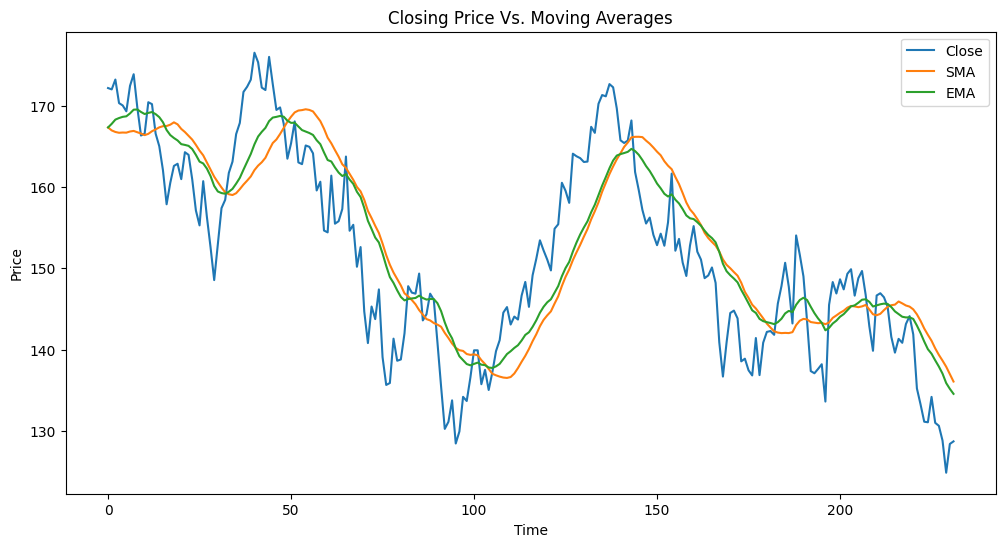

In [26]:
# @title Closing Price vs. Moving Averages

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['SMA'], label='SMA')
plt.plot(df.index, df['EMA'], label='EMA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Price Vs. Moving Averages')
_ = plt.legend()


The chart shows the price movement of a stock (in this case, Apple Inc. - AAPL) along with the SMA and EMA.

**Trend Identification**: Both moving averages(SMA and EMA) suggest similar overall trends but with different sensitivity to price changes. When the actual price crosses above the moving averages, it can indicate a potential upward trend, and when it crosses below, it may suggest a downward trend. For instance, in the initial part of the chart, the price crosses above both moving averages, hinting at an uptrend.

**Signal Confirmation**: The convergence and divergence of the SMA and EMA lines with the actual price can provide trading signals. For example, when the EMA crosses above the SMA, it can be a buy signal, indicating the start of an uptrend. Conversely, when the EMA crosses below the SMA, it might signal a potential downtrend.

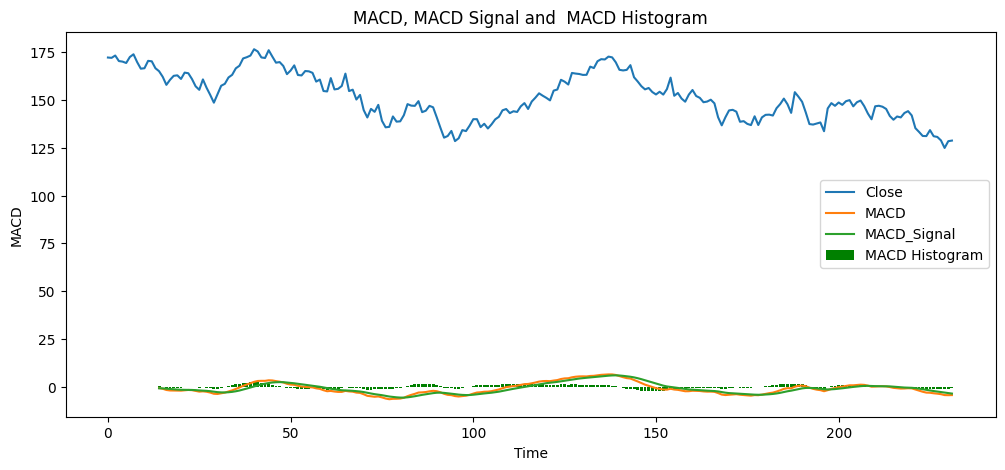

In [27]:
# @title MACD, MACD SIGNAL and  MACD HISTOGRAM

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MACD'], label='MACD')
plt.plot(df.index, df['MACD_Signal'], label='MACD_Signal')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='green')

plt.xlabel('Time')
plt.ylabel('MACD')
plt.title('MACD, MACD Signal and  MACD Histogram')
_ = plt.legend()

The chart illustrates the Moving Average Convergence Divergence (MACD) analysis for the AAPL stock.

**MACD Line (Orange)**: Tracks momentum by showing the difference between the 12-day and 26-day EMAs. When above zero, it indicates a upward trend; when below, it signals downward momentum.

**Signal Line (Green)**: A 9-day EMA of the MACD line. Crossovers with the MACD line generate buy (MACD above Signal) or sell (MACD below Signal) signals.

**MACD Histogram (Red)**: Represents the difference between the MACD and Signal lines. Positive bars suggest upward momentum, while negative bars indicate downward momentum.

**Observation**: The chart shows periods of upward and downward signals, with recent downward trends reflected by the MACD crossing below the Signal line and a negative histogram.

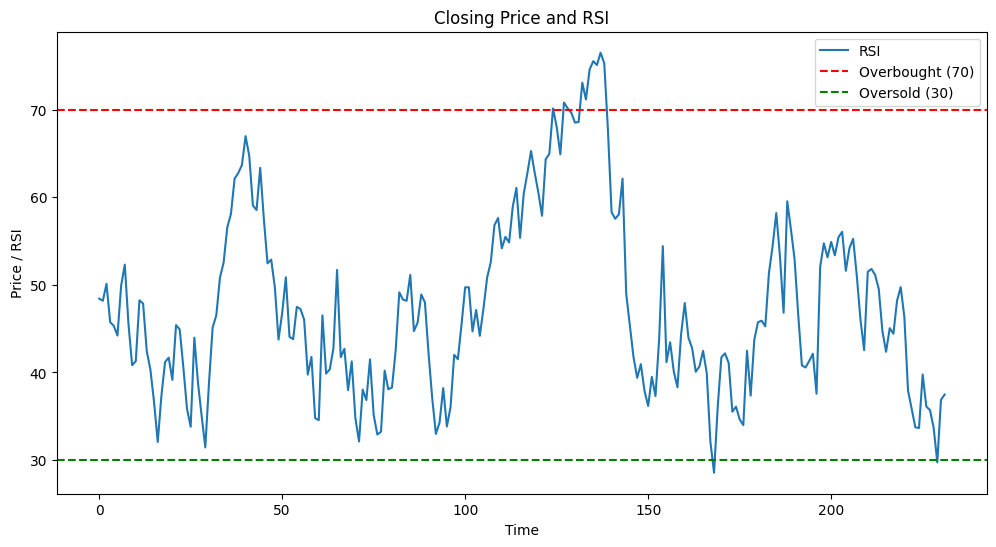

In [28]:
# @title Closing Price and RSI
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI')

plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Price / RSI')
plt.title('Closing Price and RSI')
_ = plt.legend()

plt.show()

The plot shows the **Relative Strength Index (RSI)** for a stock over time. It shows us the momentum of a stock by displaying an oscillator, essentially showing us when a stock moves above or below a certain level of RSI. Moving above a certain level more than 70 can be an indication that the stock is `overbought` which may suggest a potential price decline. And the price could soon drop while going below a certain level less than 30 shows us `oversold` which indicates a potential for the price to move back up(price increase).

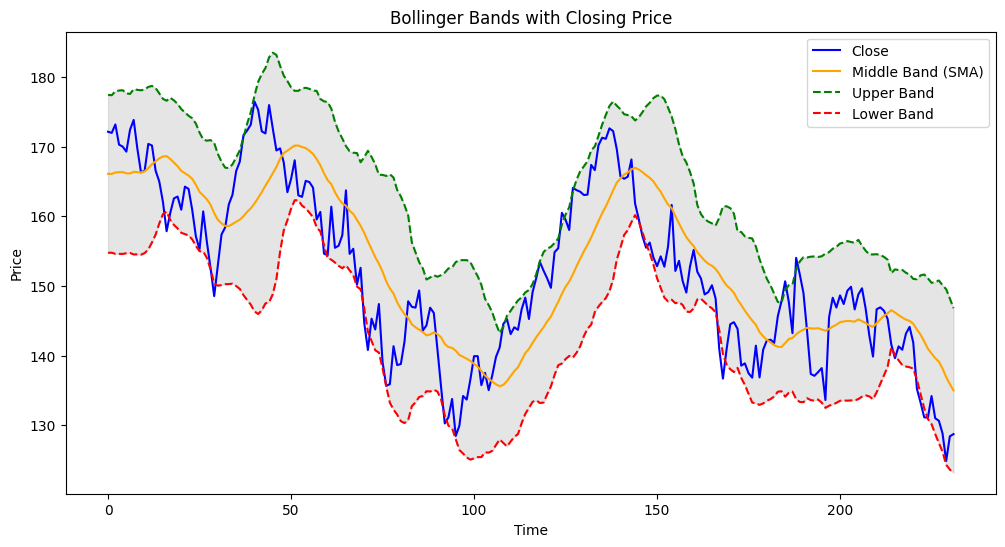

In [29]:
# @title Bollinger Bands with Closing Price
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(df.index, df['Close'], label='Close', color='blue')

# Plot the Bollinger Bands
plt.plot(df.index, df['MiddleBand'], label='Middle Band (SMA)', color='orange')
plt.plot(df.index, df['UpperBand'], label='Upper Band', color='green', linestyle='--')
plt.plot(df.index, df['LowerBand'], label='Lower Band', color='red', linestyle='--')

# Fill the area between the upper and lower bands
plt.fill_between(df.index, df['UpperBand'], df['LowerBand'], color='gray', alpha=0.2)

# Set plot labels and title
plt.title('Bollinger Bands with Closing Price')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Bollinger bands are similar to RSI in that they look to find `overbought` or `oversold` situations with the assumption that a price correction closer to the average will follow. The key difference to RSI is that the measure of when the price has reached these conditions is constantly in flux as they follow a standard deviation. Unlike RSI, Bollinger Bands sometimes detect oversold conditions that RSI misses, highlighting the importance of using multiple technical analysis tools together.

**Middle Band (Orange Line)**: This is a Simple Moving Average (SMA) of the closing prices, usually set to 20 periods.

**Upper Band (Green Dashed Line)**: The upper limit, typically two standard deviations above the SMA.

**Lower Band (Red Dashed Line)**: The lower limit, typically two standard deviations below the SMA.

When the price touches or exceeds the upper band, it might suggest that the stock is `overbought`. Conversely, when it touches or falls below the lower band, it might indicate that the stock is `oversold`. The width of the bands also gives insights into the market's volatility—wider bands suggest higher volatility, while narrower bands indicate lower volatility.

`Volatility is a measure of the degree of variation or fluctuation in the price of a financial asset over time, indicating the level of risk or uncertainty.`

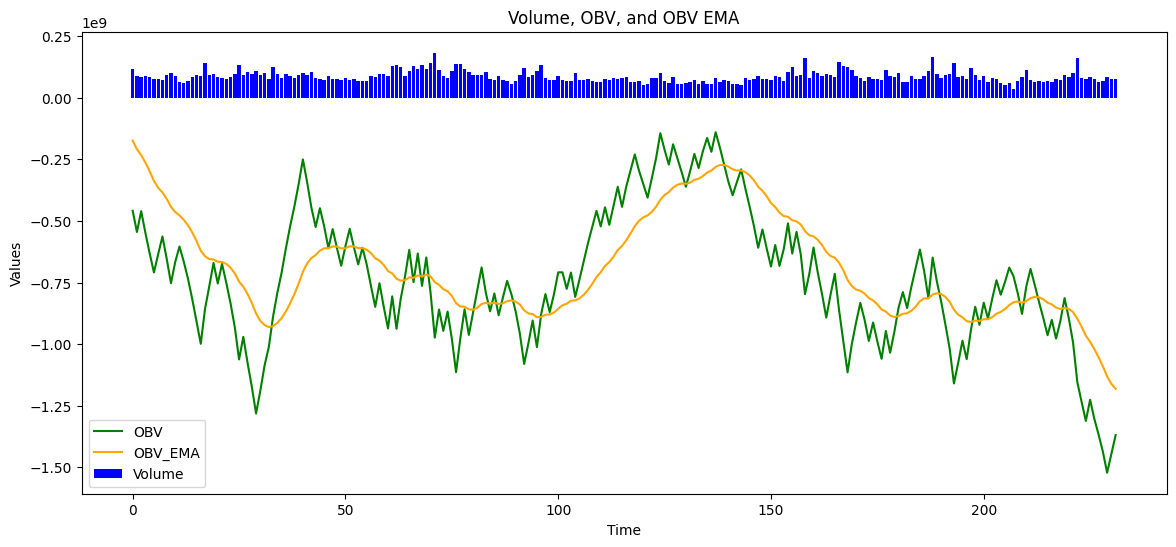

In [30]:
# @title Volume, OBV, and OBV EMA
# Create a figure and axis
plt.figure(figsize=(14, 6))

# Plot Volume
plt.bar(df.index, df['Volume'], label='Volume', color='blue')

# Plot OBV
plt.plot(df.index, df['OBV'], label='OBV', color='green')

# Plot OBV EMA
plt.plot(df.index, df['OBV_EMA'], label='OBV_EMA', color='orange')

# Adding titles and labels
plt.title('Volume, OBV, and OBV EMA')
plt.xlabel('Time')
plt.ylabel('Values')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

In the chart above, you can observe how the OBV line fluctuates in response to changes in volume. When OBV rises, it `reinforces` the upward trend. On the other hand, when OBV declines, it signals increasing selling pressure and potential bearishness in the market. The OBV EMA line helps smooth these fluctuations, providing a clearer view of the overall trend.

### **Fundamental Financial Analysis**

In [ ]:
# !pip install pyfolio-reloaded


In [11]:
import pyfolio as pf


[*********************100%***********************]  1 of 1 completed


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,81.80,2000-03-22,2003-04-17,2005-01-26,1266
1,81.24,1991-04-02,1997-12-23,1999-09-02,2198
2,76.89,1983-06-06,1985-08-15,1987-02-17,967
3,69.44,1980-12-29,1982-07-08,1983-01-20,539
4,60.87,2007-12-28,2009-01-20,2009-10-21,474


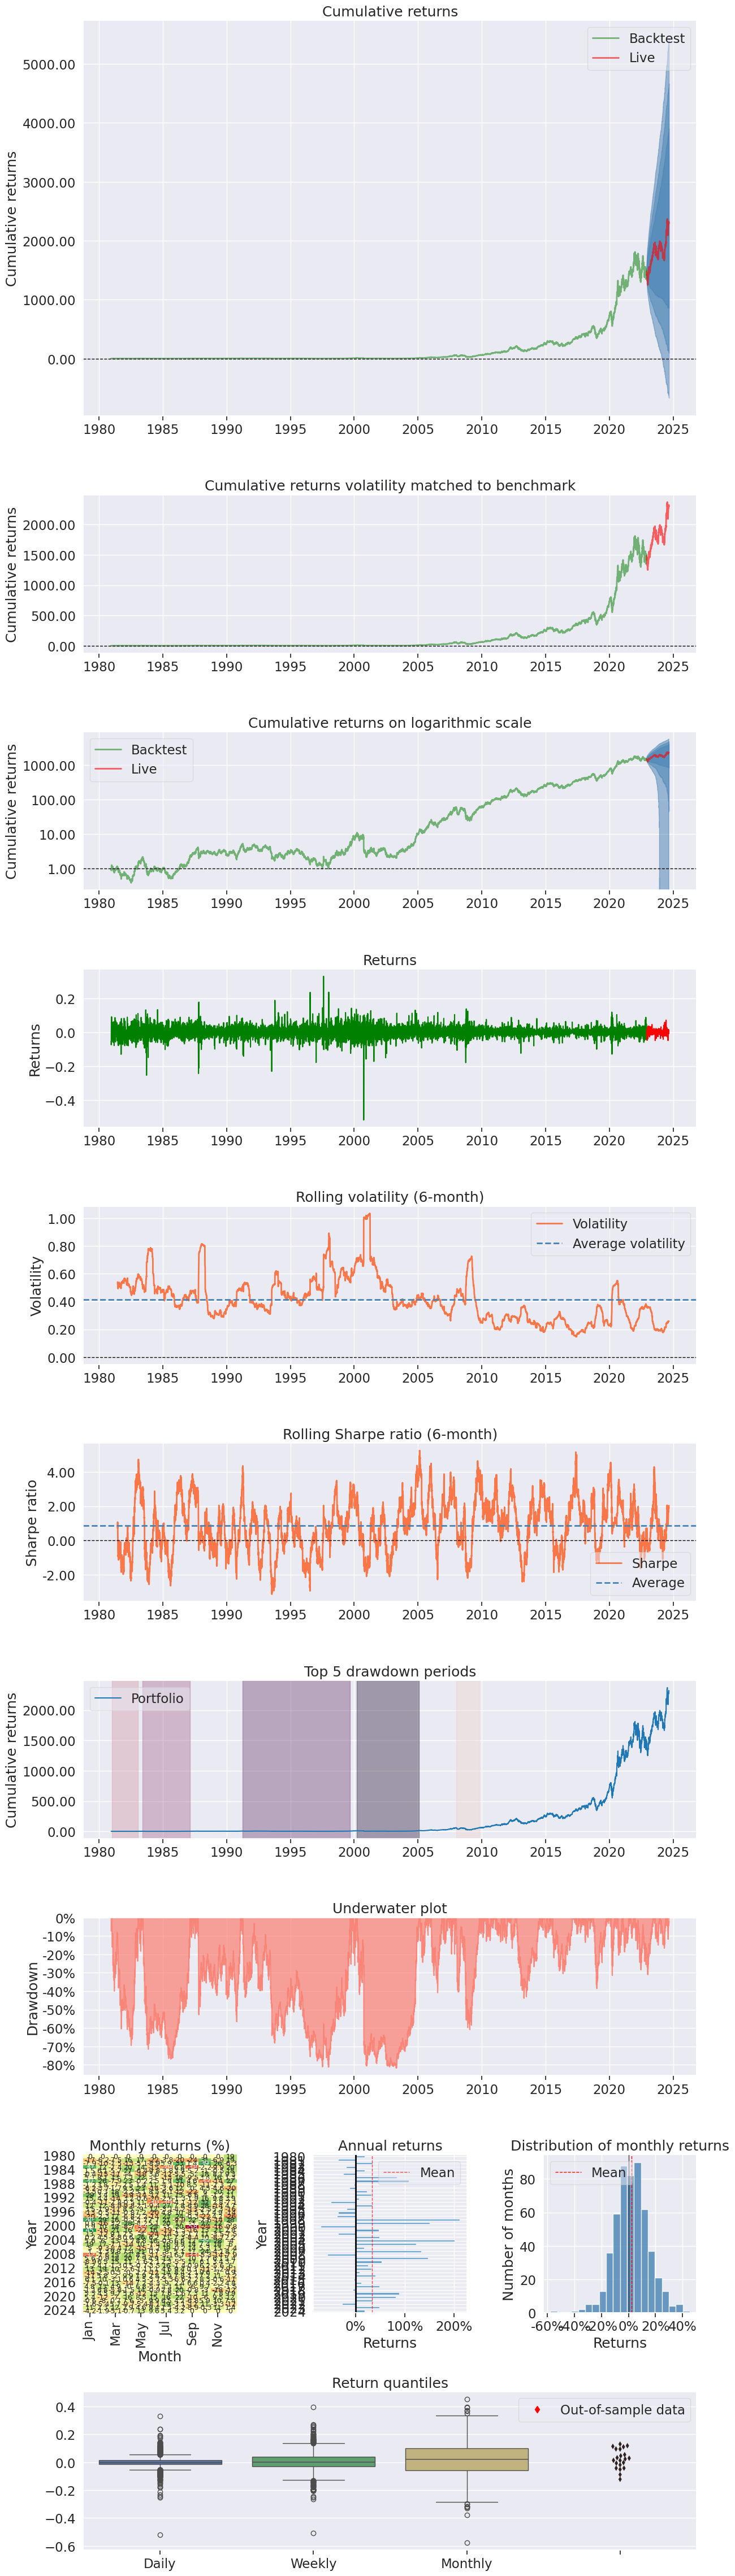

In [10]:
# Fetch the daily returns for a stock (example:Apple INC 'AAPL'
stock_rets = pf.utils.get_symbol_rets('AAPL')

# Create a returns tear sheet for the single stock
pf.create_returns_tear_sheet(stock_rets, live_start_date='2022-12-01')

As you have seen, `PyFolio` can be used for individual stock performance analysis and comparison against benchmarks and produce a series of plots and summary statistics, including:

Annual returns
Cumulative returns
Max drawdown
Sharpe ratio, Sortino ratio, and other performance metrics
Various visualizations such as rolling volatility and underwater plots

Overall, AAPL has shown strong historical performance with significant cumulative returns, although it has experienced substantial drawdowns. The out-of-sample performance is particularly notable for its higher returns, lower volatility, and improved risk metrics, indicating that the stock has become more stable and better-performing in recent years compared to its long-term history.